# МОДЕЛЬ ГЕМОЛИЗА

## **Чтение выходного файла из ANSYS WB**

Получение данных из тестового файла '1-1000.csv'. Файл должен находиться в корневой папке.

In [1]:
import pandas as pd
import numpy as np


mainHem = pd.read_csv('tracks_refer/1-1000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])

In [2]:
mainHem.head(10)

,TrTime,Z,SSS,TrDist
0,0.00000,0.000000,0.0315,0.000000
1,0.00165,0.000735,0.0312,0.000735
2,0.00256,0.001130,0.0312,0.001130
3,0.00262,0.001150,0.0313,0.001150
4,0.00289,0.001270,0.0317,0.001270
5,0.00355,0.001560,0.0326,0.001560
6,0.00407,0.001780,0.0331,0.001780
7,0.00704,0.003070,0.0355,0.003070
8,0.00745,0.003240,0.0357,0.003240
9,0.01070,0.004640,0.0378,0.004640


# Добавление нового столбца с номерами траекторий (тип float)

In [3]:
i = 0
numTrack = 0
arNumTrack = [0] * mainHem['TrTime']
while i < len(mainHem['TrTime']):
    if mainHem['TrTime'][i] == 0:
        numTrack += 1
    arNumTrack[i] = numTrack
    i += 1
mainHem['NumTrack'] = arNumTrack
    

# Количество точек по каждой траектории в массиве

In [4]:
mainHem.groupby('NumTrack').count().head() # максимальное напряжение по траекториям
mainHem.groupby('NumTrack')['SSS'].max().max() # максимальное напряжение SSS во всем массиве

24.4

# Изменение сдвигового напряжения во времени
Количество траекторий задается в строке с TvsSSSnumTrack

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
TvsSSSnumTrack = mainHem['NumTrack'].unique()[:10]
for row in TvsSSSnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['TrTime']
    y = mainHem[mainHem['NumTrack'] == row]['SSS']
    plt.plot(x, y)
    
    # Подписи к графику
    plt.xlabel('Время воздействия, с', fontsize=14)
    plt.ylabel('Сдвиговое напряжение, Па', fontsize=14)
    plt.ylim(0, 12)
plt.title('Изменение сдвигового напряжения во времени,\n количество траекторий {:.0f}'.format(len(TvsSSSnumTrack)))
plt.grid()


# Изменение сдвигового напряжения по координате Z
Координата Z отсчитывается от начала протока по оси насоса.  
Количество траекторий задается в строке с ZvsSSSnumTrack

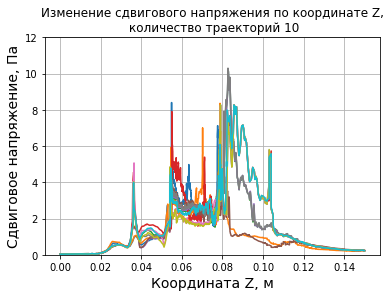

In [6]:
ZvsSSSnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsSSSnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = mainHem[mainHem['NumTrack'] == row]['SSS']
    plt.plot(x, y)
    
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('Сдвиговое напряжение, Па', fontsize=14)
    plt.ylim(0, 12)
plt.title('Изменение сдвигового напряжения по координате Z,\n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

# Пройденная частицей дистанция
Координата Z отсчитывается от начала протока по оси насоса.
Количество траекторий задается в строке с ZvsTRDISTnumTrack

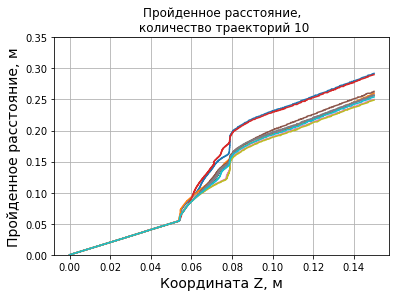

In [7]:
ZvsTRDISTnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsSSSnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = mainHem[mainHem['NumTrack'] == row]['TrDist']
    plt.plot(x, y)
    
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('Пройденное расстояние, м', fontsize=14)
    plt.ylim(0, 0.35)
plt.title('Пройденное расстояние,\n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

## Распределение максимальных напряжений на траекториях

Text(0.5, 0, 'SSS, Па')

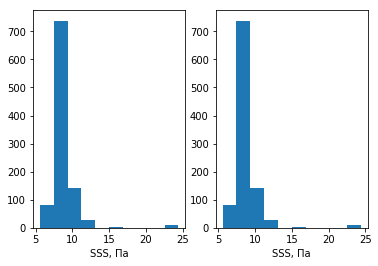

In [8]:
max_track_sss = mainHem['NumTrack'].unique()
mx_tr = []
for row in max_track_sss:
    tr = max(mainHem[mainHem['NumTrack'] == row]['SSS'])
    mx_tr.append(tr)
fig, axs = plt.subplots(1, 2)
n_bins = 10
axs[0].hist(mx_tr, bins=n_bins)
axs[1].hist(mx_tr, bins=n_bins)
axs[0].set_xlabel('SSS, Па')
axs[1].set_xlabel('SSS, Па')

# Модели гемолиза (ED1)

## Модель Giersiepen et al.(GP), Heuser et al. (HE), Zhang et al. №1 (ZHv1)

**Дописать**



In [9]:
import math
# Константы для моделей Giersiepen et al.(GP), Heuser et al.(HE), Zhang et al. #1 (ZHv1)
cGP, aGP, bGP = 3.62e-5, .785, 2.416
cHE, aHE, bHE = 1.8e-4, .765, 1.991
cZHv1, aZHv1, bZHv1 = 1.228e-5, .6606, 1.9918
#
BDIdeltasGP = []
BDIdeltasHE = []
BDIdeltasZHv1 = []
# GP, HE, ZHv1
tmGP, tmHE, tmZHv1 = 0, 0, 0
sigGP, sigHE, sigZHv1 = [], [], []
timeGP, timeHE, timeZHv1 = [], [], []
sssGP, sssHE, sssZHv1 = [], [], []
deltaGP, deltaHE, deltaZHv1 = 0, 0, 0
bdiGP, bdiHE, bdiZHv1 = 0, 0, 0
#
uniq = mainHem['NumTrack'].unique() 
for num in uniq:
    ln = len(mainHem[mainHem['NumTrack'] == num])
    #GP
    timeGP = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssGP = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    #HE
    timeHE = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssHE = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    #ZHv1
    timeZHv1 = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssZHv1 = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    for i in range(ln):
        if i == 0:
            tmGP, tmHE, tmZHv1 = 0, 0, 0
        else:
            tmGP, tmHE, tmZHv1 = timeGP[i] ** (aGP - 1), timeHE[i] ** (aHE - 1), timeZHv1[i] ** (aZHv1 - 1)
        sigGP, sigHE, sigZHv1 = sssGP[i] ** bGP, sssHE[i] ** bHE, sssZHv1[i] ** bZHv1
        deltaGP, deltaHE, deltaZHv1 = timeGP[i] - timeGP[i - 1], timeHE[i] - timeHE[i - 1], timeZHv1[i] - timeZHv1[i - 1]
        bdiGP = cGP*aGP*tmGP*sigGP*deltaGP
        bdiHE = cHE*aHE*tmHE*sigHE*deltaHE
        bdiZHv1 = cZHv1*aZHv1*tmZHv1*sigZHv1*deltaZHv1
        #Добавление в новый массив
        BDIdeltasGP.append(bdiGP)
        BDIdeltasHE.append(bdiHE)
        BDIdeltasZHv1.append(bdiZHv1)
mainHem['BDIdeltasGP'] = BDIdeltasGP
mainHem['BDIdeltasHE'] = BDIdeltasHE
mainHem['BDIdeltasZHv1'] = BDIdeltasZHv1
        

In [10]:
# Состав выборки после расширения
mainHem.groupby('NumTrack').count().head()

,TrTime,Z,SSS,TrDist,BDIdeltasGP,BDIdeltasHE,BDIdeltasZHv1
NumTrack,,,,,,,
1.0,2950,2950,2950,2950,2950,2950,2950
2.0,1530,1530,1530,1530,1530,1530,1530
3.0,1175,1175,1175,1175,1175,1175,1175
4.0,2021,2021,2021,2021,2021,2021,2021
5.0,1185,1185,1185,1185,1185,1185,1185


# Элементарный вклад

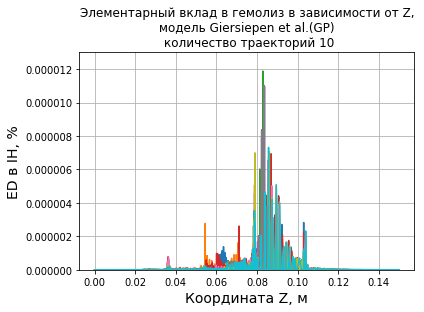

In [11]:
# коэффициенты Giersiepen et al. (GP)
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP']

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.000013)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n модель Giersiepen et al.(GP) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()
#plt.savefig('ED IH_10tracks.pdf')


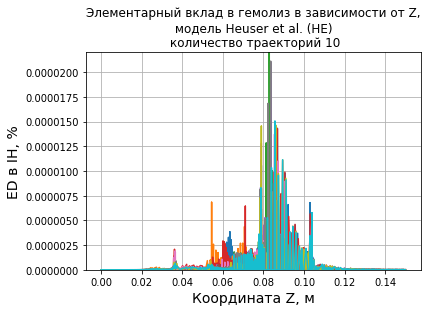

In [12]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE']
    y2 = mainHem[mainHem['NumTrack'] == row]['BDIdeltasZHv1']

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.000022)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n модель Heuser et al. (HE) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()
#plt.savefig('ED IH_10tracks.pdf')

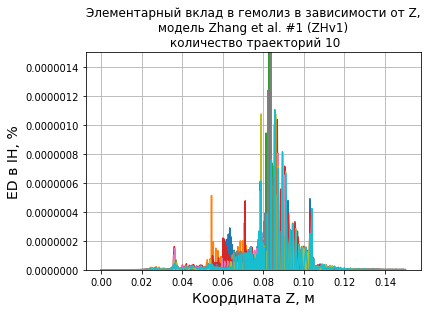

In [13]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = mainHem[mainHem['NumTrack'] == row]['BDIdeltasZHv1']

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.0000015)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n модель Zhang et al. #1 (ZHv1) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()
#plt.savefig('ED IH_10tracks.pdf')

# Индекс гемолиза по  формуле HI_1

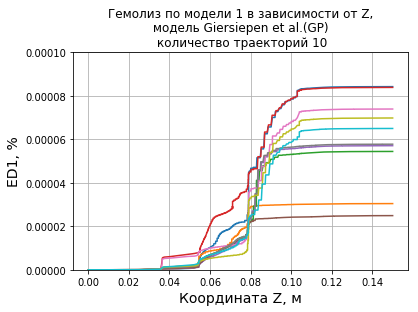

In [14]:
import itertools
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP']))

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED1, %', fontsize=14)
    plt.ylim(0, 0.0001)
plt.title('Гемолиз по модели 1 в зависимости от Z,\n модель Giersiepen et al.(GP) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()
#plt.savefig('ED IH_10tracks.pdf')

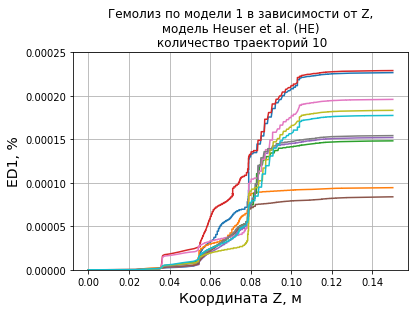

In [15]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE']))

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED1, %', fontsize=14)
    plt.ylim(0, 0.00025)
plt.title('Гемолиз по модели 1 в зависимости от Z,\n модель Heuser et al. (HE) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()
#plt.savefig('ED IH_10tracks.pdf')

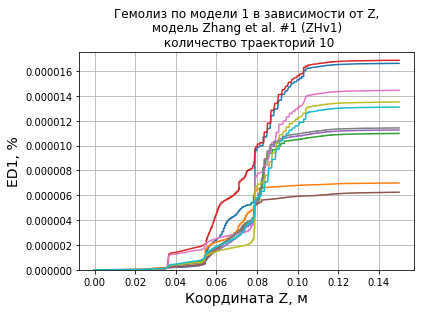

In [16]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasZHv1']))

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED1, %', fontsize=14)
    plt.ylim(0, 0.0000175)
plt.title('Гемолиз по модели 1 в зависимости от Z,\n модель Zhang et al. #1 (ZHv1) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()
#plt.savefig('ED IH_10tracks.pdf')

# Модель гемолиза 2 и 3
## Константы Giersiepen et al.(GP), Heuser et al. (HE), Zhang et al. №1 (ZHv1)

In [17]:
# Константы для моделей Giersiepen et al.(GP), Heuser et al.(HE), Zhang et al. #1 (ZHv1)
cGP, aGP, bGP = 3.62e-5, .785, 2.416
cHE, aHE, bHE = 1.8e-4, .765, 1.991
cZHv1, aZHv1, bZHv1 = 1.228e-5, .6606, 1.9918
# Model 2
BDIdeltasGP_2 = []
BDIdeltasHE_2 = []
BDIdeltasZHv1_2 = []
# GP, HE, ZHv1
sigGP_2, sigHE_2, sigZHv1_2 = [], [], []
timeGP_2, timeHE_2, timeZHv1_2 = [], [], []
sssGP_2, sssHE_2, sssZHv1_2 = [], [], []
deltaGP_2, deltaHE_2, deltaZHv1_2 = 0, 0, 0
bdiGP_2, bdiHE_2, bdiZHv1_2 = 0, 0, 0
#
uniq = mainHem['NumTrack'].unique() 
for num in uniq:
    ln = len(mainHem[mainHem['NumTrack'] == num])
    #GP
    timeGP_2 = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssGP_2 = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    #HE
    timeHE_2 = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssHE_2 = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    #ZHv1
    timeZHv1_2 = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssZHv1_2 = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    for i in range(ln):
        if i > 0:
            sigGP_2, sigHE_2, sigZHv1_2 = sssGP_2[i] ** (bGP/aGP), sssHE_2[i] ** (bHE/aHE), sssZHv1_2[i] ** (bZHv1/aZHv1)
            deltaGP_2, deltaHE_2, deltaZHv1_2 = timeGP_2[i] - timeGP_2[i - 1], timeHE_2[i] - timeHE_2[i - 1], timeZHv1_2[i] - timeZHv1_2[i - 1]
        else:
            sigGP_2, sigHE_2, sigZHv1_2 = 0, 0, 0
            deltaGP_2, deltaHE_2, deltaZHv1_2 = 0, 0, 0
        # ED 2
        bdiGP_2 = sigGP_2*abs(deltaGP_2)
        bdiHE_2 = sigHE_2*abs(deltaHE_2)
        bdiZHv1_2 = sigZHv1_2*abs(deltaZHv1_2)
        #Добавление в новый массив
        BDIdeltasGP_2.append(bdiGP_2)
        BDIdeltasHE_2.append(bdiHE_2)
        BDIdeltasZHv1_2.append(bdiZHv1_2)
mainHem['BDIdeltasGP_2'] = BDIdeltasGP_2
mainHem['BDIdeltasHE_2'] = BDIdeltasHE_2
mainHem['BDIdeltasZHv1_2'] = BDIdeltasZHv1_2

In [18]:
# Состав выборки после расширения
mainHem.groupby('NumTrack').head()

,TrTime,Z,SSS,TrDist,NumTrack,BDIdeltasGP,BDIdeltasHE,BDIdeltasZHv1,BDIdeltasGP_2,BDIdeltasHE_2,BDIdeltasZHv1_2
0,0.000000,0.000000,0.0315,0.000000,1.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.001650,0.000735,0.0312,0.000735,1.0,4.277407e-11,1.028421e-09,1.179408e-10,3.827657e-08,1.987692e-07,4.755023e-08
2,0.002560,0.001130,0.0312,0.001130,1.0,2.146473e-11,5.115649e-10,5.603751e-11,2.111011e-08,1.096242e-07,2.622467e-08
3,0.002620,0.001150,0.0313,0.001150,1.0,1.419155e-12,3.376083e-11,3.689283e-12,1.405651e-09,7.288419e-09,1.745863e-09
4,0.002890,0.001270,0.0317,0.001270,1.0,6.447749e-12,1.522635e-10,1.646955e-11,6.577538e-09,3.389995e-08,8.163022e-09
2950,0.000000,0.000000,0.0314,0.000000,2.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2951,0.000096,0.000048,0.0313,0.000048,2.0,4.607579e-12,1.171151e-10,1.808226e-11,2.239671e-09,1.161288e-08,2.781742e-09
2952,0.000772,0.000339,0.0313,0.000339,2.0,2.080555e-11,5.071965e-10,6.296634e-11,1.584637e-08,8.216477e-08,1.968170e-08
2953,0.002690,0.001170,0.0308,0.001170,2.0,4.338790e-11,1.038712e-09,1.131939e-10,4.276127e-08,2.234236e-07,5.316439e-08
2954,0.004170,0.001810,0.0330,0.001810,2.0,3.599485e-11,8.295163e-10,8.635760e-11,4.080202e-08,2.063121e-07,5.050998e-08


In [19]:
# Константы для моделей Giersiepen et al.(GP), Heuser et al.(HE), Zhang et al. #1 (ZHv1)
cGP, aGP, bGP = 3.62e-5, .785, 2.416
cHE, aHE, bHE = 1.8e-4, .765, 1.991
cZHv1, aZHv1, bZHv1 = 1.228e-5, .6606, 1.9918
# Model 3
BDIdeltasGP_3 = []
BDIdeltasHE_3 = []
BDIdeltasZHv1_3 = []
# GP, HE, ZHv1
sigGP_3, sigHE_3, sigZHv1_3 = [], [], []
timeGP_3, timeHE_3, timeZHv1_3 = [], [], []
sssGP_3, sssHE_3, sssZHv1_3 = [], [], []
deltaGP_3, deltaHE_3, deltaZHv1_3 = 0, 0, 0
bdiGP_3, bdiHE_3, bdiZHv1_3 = 0, 0, 0
#
uniq = mainHem['NumTrack'].unique() 
for num in uniq:
    ln = len(mainHem[mainHem['NumTrack'] == num])
    #GP
    timeGP_3 = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssGP_3 = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    #HE
    timeHE_3 = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssHE_3 = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    #ZHv1
    timeZHv1_3 = pd.array(mainHem[mainHem['NumTrack'] == num]['TrTime'])
    sssZHv1_3 = pd.array(mainHem[mainHem['NumTrack'] == num]['SSS'])
    for i in range(ln):
        sigGP_3, sigHE_3, sigZHv1_3 = sssGP_3[i] ** (bGP/aGP), sssHE_3[i] ** (bHE/aHE), sssZHv1_3[i] ** (bZHv1/aZHv1)
        deltaGP_3, deltaHE_3, deltaZHv1_3 = timeGP_3[i] - timeGP_3[i - 1], timeHE_3[i] - timeHE_3[i - 1], timeZHv1_3[i] - timeZHv1_3[i - 1]
        # ED 3
        lst_bdiGP_3, lst_bdiHE_3, lst_bdiZHv1_3 = 0, 0, 0
        for j in range(i):
            if j > 0:            
                lst_bdiGP_3 += (timeGP_3[j] - timeGP_3[j - 1])*sssGP_3[j] ** (bGP/aGP)
                lst_bdiHE_3 += (timeHE_3[j] - timeHE_3[j - 1])*sssHE_3[j] ** (bHE/aHE)
                lst_bdiZHv1_3 += (timeZHv1_3[j] - timeZHv1_3[j - 1])*sssZHv1_3[j] ** (bZHv1/aZHv1)
        bdiGP_3 = aGP*cGP*lst_bdiGP_3*(sigGP_3*deltaGP_3)
        bdiHE_3 = aHE*cHE*lst_bdiHE_3*(sigHE_3*deltaHE_3)
        bdiZHv1_3 = aZHv1*cZHv1*lst_bdiZHv1_3*(sigZHv1_3*deltaZHv1_3)
        #Добавление в новый массив
        BDIdeltasGP_3.append(bdiGP_3)
        BDIdeltasHE_3.append(bdiHE_3)
        BDIdeltasZHv1_3.append(bdiZHv1_3)
mainHem['BDIdeltasGP_3'] = BDIdeltasGP_3
mainHem['BDIdeltasHE_3'] = BDIdeltasHE_3
mainHem['BDIdeltasZHv1_3'] = BDIdeltasZHv1_3

In [20]:
# Состав выборки после расширения
mainHem.groupby('NumTrack').head()

,TrTime,Z,SSS,TrDist,NumTrack,BDIdeltasGP,BDIdeltasHE,BDIdeltasZHv1,BDIdeltasGP_2,BDIdeltasHE_2,BDIdeltasZHv1_2,BDIdeltasGP_3,BDIdeltasHE_3,BDIdeltasZHv1_3
0,0.000000,0.000000,0.0315,0.000000,1.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,0.001650,0.000735,0.0312,0.000735,1.0,4.277407e-11,1.028421e-09,1.179408e-10,3.827657e-08,1.987692e-07,4.755023e-08,0.000000e+00,0.000000e+00,0.000000e+00
2,0.002560,0.001130,0.0312,0.001130,1.0,2.146473e-11,5.115649e-10,5.603751e-11,2.111011e-08,1.096242e-07,2.622467e-08,2.296157e-20,3.000471e-18,1.011579e-20
3,0.002620,0.001150,0.0313,0.001150,1.0,1.419155e-12,3.376083e-11,3.689283e-12,1.405651e-09,7.288419e-09,1.745863e-09,2.372164e-21,3.095083e-19,1.044854e-21
4,0.002890,0.001270,0.0317,0.001270,1.0,6.447749e-12,1.522635e-10,1.646955e-11,6.577538e-09,3.389995e-08,8.163022e-09,1.136293e-20,1.473610e-18,5.000970e-21
2950,0.000000,0.000000,0.0314,0.000000,2.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
2951,0.000096,0.000048,0.0313,0.000048,2.0,4.607579e-12,1.171151e-10,1.808226e-11,2.239671e-09,1.161288e-08,2.781742e-09,0.000000e+00,0.000000e+00,0.000000e+00
2952,0.000772,0.000339,0.0313,0.000339,2.0,2.080555e-11,5.071965e-10,6.296634e-11,1.584637e-08,8.216477e-08,1.968170e-08,1.008538e-21,1.313892e-19,4.441363e-22
2953,0.002690,0.001170,0.0308,0.001170,2.0,4.338790e-11,1.038712e-09,1.131939e-10,4.276127e-08,2.234236e-07,5.316439e-08,2.197720e-20,2.885109e-18,9.687997e-21
2954,0.004170,0.001810,0.0330,0.001810,2.0,3.599485e-11,8.295163e-10,8.635760e-11,4.080202e-08,2.063121e-07,5.050998e-08,7.055069e-20,9.011427e-18,3.098815e-20


# Индекс гемолиза по  формуле HI_2

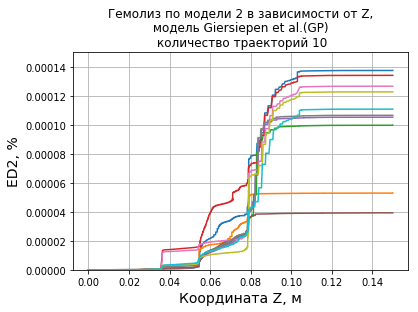

In [21]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = list(map(lambda t: cGP * (t ** aGP), list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP_2']))))
            
    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED2, %', fontsize=14)
    plt.ylim(0, 0.00015)
plt.title('Гемолиз по модели 2 в зависимости от Z,\n модель Giersiepen et al.(GP) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

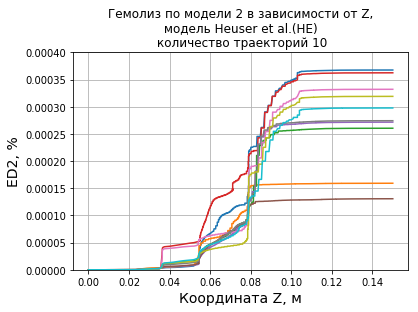

In [22]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = list(map(lambda t: cHE * (t ** aHE), list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE_2']))))
            
    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED2, %', fontsize=14)
    plt.ylim(0, 0.0004)
plt.title('Гемолиз по модели 2 в зависимости от Z,\n модель Heuser et al.(HE) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

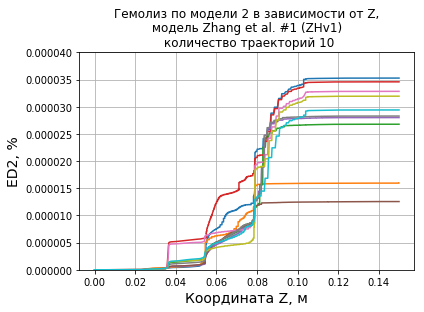

In [23]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = list(map(lambda t: cZHv1 * (t ** aZHv1), list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasZHv1_2']))))
            
    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED2, %', fontsize=14)
    plt.ylim(0, 0.00004)
plt.title('Гемолиз по модели 2 в зависимости от Z,\n модель Zhang et al. #1 (ZHv1) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

# Элементарные вклады по модели 2

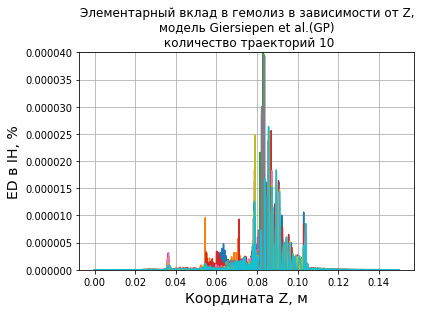

In [24]:
# Модель 2, константы GP
tr_gp_nums = mainHem['NumTrack'].unique()[:10]
for row in tr_gp_nums:
    x_gp_2 = mainHem[mainHem['NumTrack'] == row]['Z']
    y_gp_2 = list(map(lambda t: cGP * (t ** aGP), mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP_2']))
    plt.plot(x_gp_2, y_gp_2)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.00004)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n модель Giersiepen et al.(GP) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()


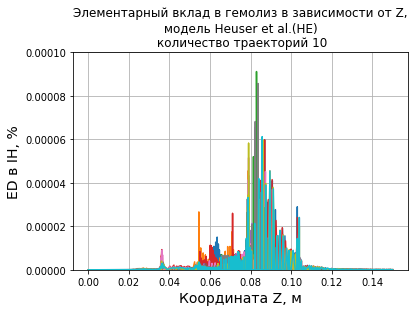

In [25]:
# Модель 2, константы HE
for row in tr_gp_nums:
    x_he_2 = mainHem[mainHem['NumTrack'] == row]['Z']
    y_he_2 = list(map(lambda t: cHE * (t ** aHE), mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE_2']))
    plt.plot(x_he_2, y_he_2)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.0001)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n модель Heuser et al.(HE) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

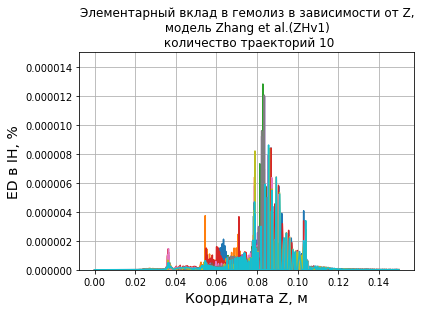

In [26]:
# Модель 2, константы ZHv1
for row in tr_gp_nums:
    x_zh_2 = mainHem[mainHem['NumTrack'] == row]['Z']
    y_zh_2 = list(map(lambda t: cZHv1 * (t ** aZHv1), mainHem[mainHem['NumTrack'] == row]['BDIdeltasZHv1_2']))
    plt.plot(x_zh_2, y_zh_2)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.000015)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n модель Zhang et al.(ZHv1) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

# Индекс гемолиза по  формуле HI_3

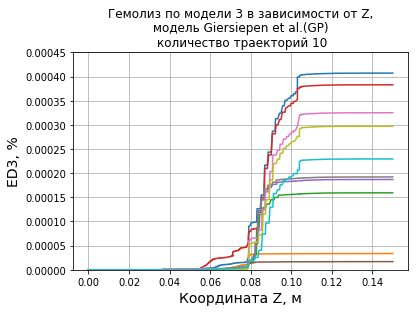

In [27]:
# Константы Giersiepen et al. (GP)
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x_gp_3 = mainHem[mainHem['NumTrack'] == row]['Z']
    y_gp_3 = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP_3']))
            
    plt.plot(x_gp_3, y_gp_3)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED3, %', fontsize=14)
    plt.ylim(0, 0.00045)
plt.title('Гемолиз по модели 3 в зависимости от Z,\n модель Giersiepen et al.(GP) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

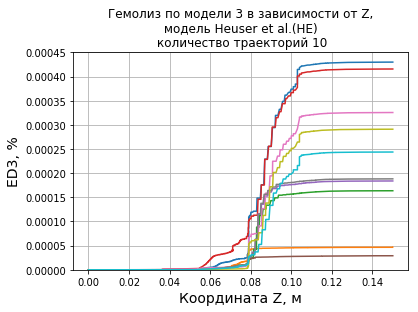

In [28]:
# Константы Heuser et al. (HE)
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x_he_3 = mainHem[mainHem['NumTrack'] == row]['Z']
    y_he_3 = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE_3']))
            
    plt.plot(x_he_3, y_he_3)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED3, %', fontsize=14)
    plt.ylim(0, 0.00045)
plt.title('Гемолиз по модели 3 в зависимости от Z,\n модель Heuser et al.(HE) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

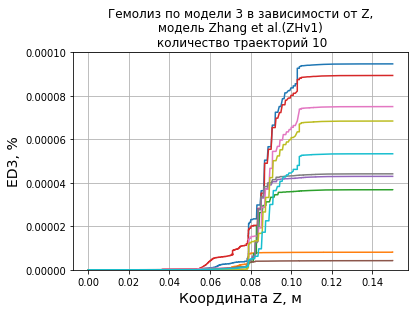

In [29]:
# Константы Zhang et al. (ZHv1)
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x_zh_3 = mainHem[mainHem['NumTrack'] == row]['Z']
    y_zh_3 = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasZHv1_3']))
            
    plt.plot(x_zh_3, y_zh_3)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED3, %', fontsize=14)
    plt.ylim(0, 0.0001)
plt.title('Гемолиз по модели 3 в зависимости от Z,\n модель Zhang et al.(ZHv1) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

# Элементарные вклады по модели 3

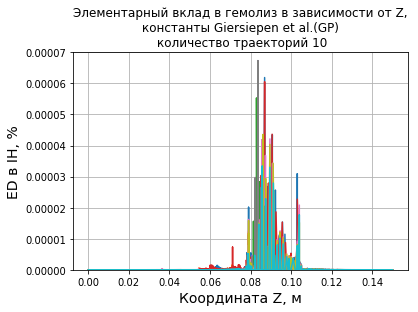

In [30]:
# Модель 3, константы GP
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP_3']

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.00007)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n константы Giersiepen et al.(GP) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

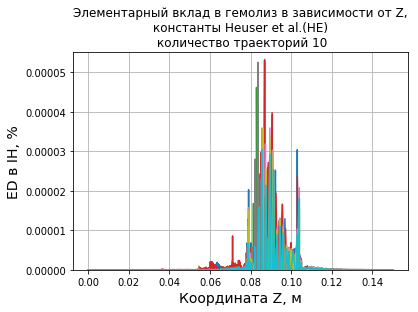

In [31]:
# Модель 3, константы HE
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE_3']

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.000055)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n константы Heuser et al.(HE) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

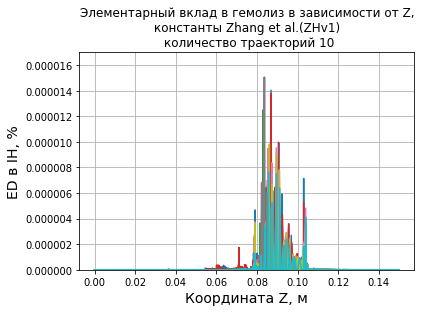

In [32]:
# Модель 3, константы ZHv1
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[:10]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    y = mainHem[mainHem['NumTrack'] == row]['BDIdeltasZHv1_3']

    plt.plot(x, y)
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED в IH, %', fontsize=14)
    plt.ylim(0, 0.000017)
plt.title('Элементарный вклад в гемолиз в зависимости от Z,\n константы Zhang et al.(ZHv1) \n количество траекторий {:.0f}'.format(len(ZvsSSSnumTrack)))
plt.grid()

# Сравнение трех моделей гемолиза 
## Константы GP

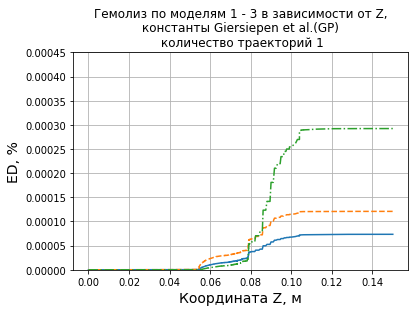

In [33]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[130:131]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    yGP = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP']))
    yGP_2 = list(map(lambda t: cGP * (t ** aGP), list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP_2']))))
    yGP_3 = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP_3']))
            
    plt.plot(x, yGP, '-', x, yGP_2, '--', x, yGP_3, '-.')
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED, %', fontsize=14)
    plt.ylim(0, 0.00045)
plt.title('Гемолиз по моделям 1 - 3 в зависимости от Z,\n константы Giersiepen et al.(GP) \n количество траекторий {:.0f}'.format(len(ZvsBDIdeltasGPnumTrack)))
plt.grid()

# Константы HE

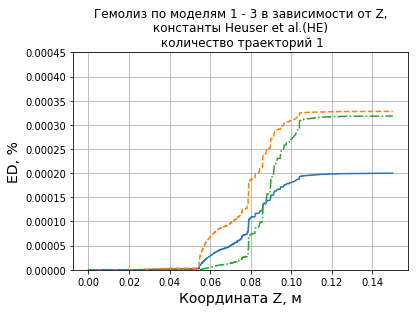

In [34]:
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[130:131]
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    yHE = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE']))
    yHE_2 = list(map(lambda t: cHE * (t ** aHE), list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE_2']))))
    yHE_3 = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE_3']))
            
    plt.plot(x, yHE, '-', x, yHE_2, '--', x, yHE_3, '-.')
    # Подписи к графику
    plt.xlabel('Координата Z, м', fontsize=14)
    plt.ylabel('ED, %', fontsize=14)
    plt.ylim(0, 0.00045)
plt.title('Гемолиз по моделям 1 - 3 в зависимости от Z,\n константы Heuser et al.(HE) \n количество траекторий {:.0f}'.format(len(ZvsBDIdeltasGPnumTrack)))
plt.grid()

# СОХРАНЕНИЕ ФАЙЛОВ .CSV

In [35]:
import pandas as pd
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()[2:3]
dt = pd.DataFrame()
for row in ZvsBDIdeltasGPnumTrack:
    x = mainHem[mainHem['NumTrack'] == row]['Z']
    # GP
    yGP = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP']))
    yGP_2 = list(map(lambda t: cGP * (t ** aGP), list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP_2']))))
    yGP_3 = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasGP_3']))
    # HE
    yHE = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE']))
    yHE_2 = list(map(lambda t: cHE * (t ** aHE), list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE_2']))))
    yHE_3 = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row]['BDIdeltasHE_3']))
dt['Z, m'] = x
dt['BD_GP_1_tr3'] = yGP
dt['BD_GP_2_tr3'] = yGP_2
dt['BD_GP_3_tr3'] = yGP_3
dt['BD_HE_1_tr3'] = yHE
dt['BD_HE_2_tr3'] = yHE_2
dt['BD_HE_3_tr3'] = yHE_3
dt.to_csv('onetrack_1_2_3_model_GP_HE_tr3.csv', header=False)

In [36]:
mainHem[mainHem['NumTrack'] == 1.0]

,TrTime,Z,SSS,TrDist,NumTrack,BDIdeltasGP,BDIdeltasHE,BDIdeltasZHv1,BDIdeltasGP_2,BDIdeltasHE_2,BDIdeltasZHv1_2,BDIdeltasGP_3,BDIdeltasHE_3,BDIdeltasZHv1_3
0,0.00000,0.000000,0.0315,0.000000,1.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,0.00165,0.000735,0.0312,0.000735,1.0,4.277407e-11,1.028421e-09,1.179408e-10,3.827657e-08,1.987692e-07,4.755023e-08,0.000000e+00,0.000000e+00,0.000000e+00
2,0.00256,0.001130,0.0312,0.001130,1.0,2.146473e-11,5.115649e-10,5.603751e-11,2.111011e-08,1.096242e-07,2.622467e-08,2.296157e-20,3.000471e-18,1.011579e-20
3,0.00262,0.001150,0.0313,0.001150,1.0,1.419155e-12,3.376083e-11,3.689283e-12,1.405651e-09,7.288419e-09,1.745863e-09,2.372164e-21,3.095083e-19,1.044854e-21
4,0.00289,0.001270,0.0317,0.001270,1.0,6.447749e-12,1.522635e-10,1.646955e-11,6.577538e-09,3.389995e-08,8.163022e-09,1.136293e-20,1.473610e-18,5.000970e-21
5,0.00355,0.001560,0.0326,0.001560,1.0,1.613455e-11,3.749648e-10,3.969723e-11,1.752521e-08,8.912975e-08,2.171152e-08,3.355114e-20,4.290475e-18,1.473901e-20
6,0.00407,0.001780,0.0331,0.001780,1.0,1.280629e-11,2.948901e-10,3.077778e-11,1.446997e-08,7.306113e-08,1.790939e-08,3.490827e-20,4.413665e-18,1.531225e-20
7,0.00704,0.003070,0.0355,0.003070,1.0,7.699424e-11,1.702219e-09,1.677923e-10,1.025142e-07,5.006796e-07,1.263267e-07,2.894649e-19,3.528344e-17,1.263606e-19
8,0.00745,0.003240,0.0357,0.003240,1.0,1.064376e-11,2.344895e-10,2.297817e-11,1.439861e-08,7.013541e-08,1.773696e-08,8.260201e-20,9.777906e-18,3.591826e-20
9,0.01070,0.004640,0.0378,0.004640,1.0,8.961161e-11,1.912927e-09,1.805076e-10,1.360880e-07,6.451238e-07,1.670418e-07,8.363927e-19,9.617010e-17,3.623032e-19


# Проверка сходимости гемолиаз по Лагранжу для различных констант аппроксимации

Используются три модели гемолиаз и несколько эмпирических констант (согласно таблице в диссертации). Полный файл содержит 10000 частиц

In [42]:
# Вариация гемолиза в зависимости от количества треков
# 1 stage: гемолиз по пулам струек (по 250 траекторий)
# Модель 1
names_columns = list(mainHem)[5:8] # Модель 1
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()
convX = [250, 500, 750, 1000]
conv_1 = []

for rng in convX:
    tracks_hem = 0
    for name_col in names_columns:
        for row in ZvsBDIdeltasGPnumTrack[:rng]:
            ac_hem = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row][name_col]))
            tracks_hem += ac_hem[-1]
        print('Модель и константы - {}'.format(name_col))
        print('Гемолиза для {} траекторий (в %) = {}'.format(rng, tracks_hem / rng))
        conv_1.append(tracks_hem / rng)    
        

# Модель 3
names_columns_2 = list(mainHem)[-3:] # Модель 1
ZvsBDIdeltasGPnumTrack = mainHem['NumTrack'].unique()
conv_3 = []
for rng in convX:
    tracks_hem = 0
    for name_col in names_columns_2:
        for row in ZvsBDIdeltasGPnumTrack[:rng]:
            ac_hem = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == row][name_col]))
            tracks_hem += ac_hem[-1]
        print('Модель и константы - {}'.format(name_col))
        print('Гемолиза для {} траекторий (в %) = {}'.format(rng, tracks_hem / rng))
        conv_3.append(tracks_hem / rng)

Модель и константы - BDIdeltasGP
Гемолиза для 250 траекторий (в %) = 6.250490190764787e-05
Модель и константы - BDIdeltasHE
Гемолиза для 250 траекторий (в %) = 0.0002328513223000543
Модель и константы - BDIdeltasZHv1
Гемолиза для 250 траекторий (в %) = 0.00024540165177630954
Модель и константы - BDIdeltasGP
Гемолиза для 500 траекторий (в %) = 5.864541414873807e-05
Модель и константы - BDIdeltasHE
Гемолиза для 500 траекторий (в %) = 0.00021906228813664503
Модель и константы - BDIdeltasZHv1
Гемолиза для 500 траекторий (в %) = 0.00023088401298691918
Модель и константы - BDIdeltasGP
Гемолиза для 750 траекторий (в %) = 5.2441015580180593e-05
Модель и константы - BDIdeltasHE
Гемолиза для 750 траекторий (в %) = 0.00019792590220615757
Модель и константы - BDIdeltasZHv1
Гемолиза для 750 траекторий (в %) = 0.0002086439210916198
Модель и константы - BDIdeltasGP
Гемолиза для 1000 траекторий (в %) = 5.270392476000286e-05
Модель и константы - BDIdeltasHE
Гемолиза для 1000 траекторий (в %) = 0.000198

In [43]:
conv_3

[0.00023697145338333908,
 0.000486896876288509,
 0.0005419805520561253,
 0.00021587530960384322,
 0.00044257929301833645,
 0.0004927141162881211,
 0.00017884327813131044,
 0.00036829498158175747,
 0.00040986793158378755,
 0.00018196790241935357,
 0.000374837520061338,
 0.0004171403306305498]

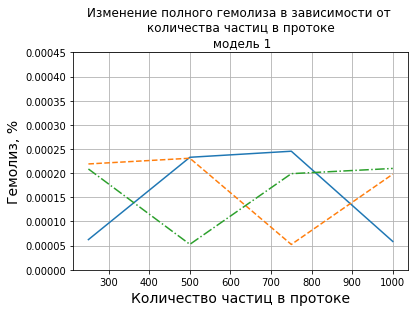

In [50]:
# Model 1 and 3
x = convX
yGP = conv_1[:4]
yHE = conv_1[4:8]
yZHv1 = conv_1[8:12]
            
plt.plot(x, yGP, '-', x, yHE, '--', x, yZHv1, '-.')
    # Подписи к графику
plt.xlabel('Количество частиц в протоке', fontsize=14)
plt.ylabel('Гемолиз, %', fontsize=14)
plt.ylim(0, 0.00045)
plt.title('Изменение полного гемолиза в зависимости от \n количества частиц в протоке \n модель 1')
plt.grid()

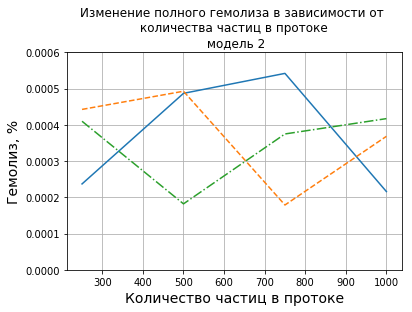

In [52]:
x = convX
yGP = conv_3[:4]
yHE = conv_3[4:8]
yZHv1 = conv_3[8:12]
            
plt.plot(x, yGP, '-', x, yHE, '--', x, yZHv1, '-.')
    # Подписи к графику
plt.xlabel('Количество частиц в протоке', fontsize=14)
plt.ylabel('Гемолиз, %', fontsize=14)
plt.ylim(0, 0.0006)
plt.title('Изменение полного гемолиза в зависимости от \n количества частиц в протоке \n модель 2')
plt.grid()

In [ ]:
num_tr = mainHem['NumTrack'].unique()
print(num_tr[:250])
t1 = pd.array(mainHem['BDIdeltasHE'][mainHem['NumTrack'] == 1.0][-3:-2])
t2 = pd.array(mainHem['BDIdeltasHE'][mainHem['NumTrack'] == 3.0][-3:-2])
t_ac = list(itertools.accumulate(mainHem[mainHem['NumTrack'] == 1.0]['BDIdeltasGP']))
print(t1, t2)
print(t_ac[-1] + 2)

# Работа со всеми траекториями

## Объединение файлов в массив (10000 траекторий)

In [53]:
mainHem_1 = pd.read_csv('tracks_refer/1-1000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_2 = pd.read_csv('tracks_refer/1001-2000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_3 = pd.read_csv('tracks_refer/2001-3000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_4 = pd.read_csv('tracks_refer/3001-4000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_5 = pd.read_csv('tracks_refer/4001-5000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_6 = pd.read_csv('tracks_refer/5001-6000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_7 = pd.read_csv('tracks_refer/6001-7000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_8 = pd.read_csv('tracks_refer/7001-8000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_9 = pd.read_csv('tracks_refer/8001-9000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])
mainHem_10 = pd.read_csv('tracks_refer/9001-10000.csv', delimiter=',', names=['TrTime', 'Z', 'SSS', 'TrDist'])

In [67]:
mainHem_2.head

<bound method NDFrame.head of            TrTime         Z     SSS    TrDist
0        0.000000  0.000000  0.0325  0.000000
1        0.000301  0.000150  0.0326  0.000150
2        0.001510  0.000671  0.0330  0.000671
3        0.002290  0.001010  0.0333  0.001010
4        0.003120  0.001370  0.0339  0.001370
5        0.004970  0.002170  0.0348  0.002170
6        0.005520  0.002410  0.0352  0.002410
7        0.006240  0.002720  0.0352  0.002720
8        0.006580  0.002870  0.0351  0.002870
9        0.008500  0.003700  0.0359  0.003700
10       0.010100  0.004380  0.0361  0.004380
11       0.010900  0.004760  0.0395  0.004760
12       0.011800  0.005150  0.0435  0.005150
13       0.013300  0.005780  0.0418  0.005780
14       0.015100  0.006570  0.0398  0.006570
15       0.015600  0.006810  0.0401  0.006810
16       0.017000  0.007410  0.0395  0.007410
17       0.017700  0.007690  0.0400  0.007690
18       0.017900  0.007800  0.0413  0.007800
19       0.018200  0.007930  0.0432  0.007930
20  

In [70]:
fulHem = np.vstack((mainHem_1, mainHem_2))

In [73]:
fulHem.head

AttributeError: 'numpy.ndarray' object has no attribute 'head'